# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

**1. I think about 1/9 or 11% of values have the first digit of 1 and the same should be true for a first digit of 9. This is because every non-zero digit has an equal chance of showing up.**

**2. There should be around 10% of values with a last digit of 1 or 9 due to 10 distinct digits including 0 can occur for a last digit.**

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file (https://dlsun.github.io/pods/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [ ]:
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_sap = pd.read_csv(data_dir + "sp500.csv")
df_sap.set_index(["Name"], inplace = True)
df_sap.head()

,date,open,close,volume
Name,,,,
AAL,2018-02-01,$54.00,$53.88,3623078
AAPL,2018-02-01,$167.16,$167.78,47230787
AAP,2018-02-01,$116.24,$117.29,760629
ABBV,2018-02-01,$112.24,$116.34,9943452
ABC,2018-02-01,$97.74,$99.29,2786798


**There are no instances of duplication among the Name variable, so it is a good choice for designating an index.**

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

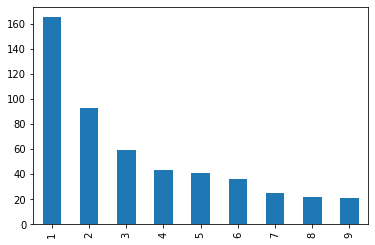

In [ ]:
df_sap["volume_str"] = df_sap["volume"].astype(str)
df_sap["first_digit"] = df_sap["volume_str"].str[0].astype(int)
df_sap["first_digit"].value_counts().plot(kind = "bar", xlabel = "First Digit", ylabel = "Count")

**There appears to be a non-uniform distribution of the first digits among the volume column. This conflicts with my previous assumption of uniform probability among the digits.**

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

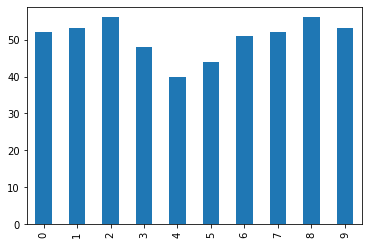

In [ ]:
df_sap["volume_str"] = df_sap["volume"].astype(str)
df_sap["last_digit"] = df_sap["volume_str"].str[-1].astype(int)
df_sap["last_digit"].value_counts().loc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]].plot(kind = "bar", xlabel = "Last Digit", ylabel = "Count")

**This distribution seems to more plausibly demonstrate a uniform distribution among the digits than the first digit plot.**

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

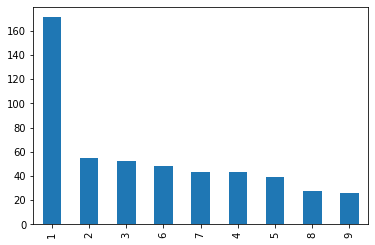

In [ ]:
df_sap["close_str"] = df_sap["close"].astype(str)
df_sap["close_first"] = df_sap["close_str"].str[1].astype(int)
df_sap["close_first"].value_counts().plot(kind = "bar", xlabel = "First Digit", ylabel = "Count")

**The first digit distribution for the close variable shows a similar pattern to that of the volume variable. That indicates that there is some evidence of a skewed distribution of numbers among first digits.**